In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

**Reading the csv files below**

In [3]:
census_learn=pd.read_csv("/Users/manishabrahmachary/Anales/us_census_full/census_income_learn.csv", encoding = "ISO-8859-1",header=None)
census_test=pd.read_csv("/Users/manishabrahmachary/Anales/us_census_full/census_income_test.csv",encoding = "ISO-8859-1",header=None)

**Looking at the structure of 'census_learn' file. shape give the number of rows and columns**

In [4]:
census_learn.shape

(199523, 42)

**From the metadata given I created another csv file with the column headers. I am reading it below.**

In [5]:
columns=pd.read_csv("/Users/manishabrahmachary/Anales/column_names.csv",encoding = "ISO-8859-1" )

** I am trying to understand how python read the "columns' file. We notice that except for 'age' every other name is preceded by '|'. So I would have to remove it to bring it to an appropriate format.**

In [6]:
col=columns.columns.values

In [7]:
col

array(['age', '| class of worker', '| industry code', '| occupation code',
       '| adjusted gross income', '| education', '| wage per hour',
       '| enrolled in edu inst last wk', '| marital status',
       '| major industry code', '| major occupation code', '| mace',
       '| hispanic Origin', '| sex', '| member of a labor union',
       '| reason for unemployment', '| full or part time employment stat',
       '| capital gains', '| capital losses', '| divdends from stocks',
       '| federal income tax liability', '| tax filer status',
       '| region of previous residence', '| state of previous residence',
       '| detailed household and family stat',
       '| detailed household summary in household', '| instance weight',
       '| migration code-change in msa', '| migration code-change in reg',
       '| migration code-move within reg',
       '| live in this house 1 year ago',
       '| migration prev res in sunbelt',
       '| num persons worked for employer', '| family m

** The step below removes the unwanted '|' from all names above except 'age' which did not have it in the first place. We notice that after removing '|' we create a space before every name. For example '| reason for unemployment" will now be ' reason for unemployment. I won't remove the space because it is immaterial.**

In [8]:
columns=[s.replace('|' , '') for s in col]

In [9]:
columns

['age',
 ' class of worker',
 ' industry code',
 ' occupation code',
 ' adjusted gross income',
 ' education',
 ' wage per hour',
 ' enrolled in edu inst last wk',
 ' marital status',
 ' major industry code',
 ' major occupation code',
 ' mace',
 ' hispanic Origin',
 ' sex',
 ' member of a labor union',
 ' reason for unemployment',
 ' full or part time employment stat',
 ' capital gains',
 ' capital losses',
 ' divdends from stocks',
 ' federal income tax liability',
 ' tax filer status',
 ' region of previous residence',
 ' state of previous residence',
 ' detailed household and family stat',
 ' detailed household summary in household',
 ' instance weight',
 ' migration code-change in msa',
 ' migration code-change in reg',
 ' migration code-move within reg',
 ' live in this house 1 year ago',
 ' migration prev res in sunbelt',
 ' num persons worked for employer',
 ' family members under 18',
 ' total person earnings',
 ' country of birth father',
 ' country of birth mother',
 ' count

** We see from above there are a few extra names which we have to get rid of and two missing names. In the steps below we are doing just that. remove() removes a name and append() adds to the end of the array.**

In [10]:
columns.remove(" adjusted gross income")



In [11]:
columns=[' race' if x==' mace' else x for x in columns]

In [12]:
columns.remove(' federal income tax liability')

In [13]:
columns.remove(' total person earnings')

In [14]:
columns.remove(' total person income')
columns.remove(' taxable income amount')

In [15]:
np.append(columns, ' year')

array(['age', ' class of worker', ' industry code', ' occupation code',
       ' education', ' wage per hour', ' enrolled in edu inst last wk',
       ' marital status', ' major industry code', ' major occupation code',
       ' race', ' hispanic Origin', ' sex', ' member of a labor union',
       ' reason for unemployment', ' full or part time employment stat',
       ' capital gains', ' capital losses', ' divdends from stocks',
       ' tax filer status', ' region of previous residence',
       ' state of previous residence',
       ' detailed household and family stat',
       ' detailed household summary in household', ' instance weight',
       ' migration code-change in msa', ' migration code-change in reg',
       ' migration code-move within reg', ' live in this house 1 year ago',
       ' migration prev res in sunbelt',
       ' num persons worked for employer', ' family members under 18',
       ' country of birth father', ' country of birth mother',
       ' country of birth

In [16]:
columns=np.append(columns, ' year')

In [17]:
columns

array(['age', ' class of worker', ' industry code', ' occupation code',
       ' education', ' wage per hour', ' enrolled in edu inst last wk',
       ' marital status', ' major industry code', ' major occupation code',
       ' race', ' hispanic Origin', ' sex', ' member of a labor union',
       ' reason for unemployment', ' full or part time employment stat',
       ' capital gains', ' capital losses', ' divdends from stocks',
       ' tax filer status', ' region of previous residence',
       ' state of previous residence',
       ' detailed household and family stat',
       ' detailed household summary in household', ' instance weight',
       ' migration code-change in msa', ' migration code-change in reg',
       ' migration code-move within reg', ' live in this house 1 year ago',
       ' migration prev res in sunbelt',
       ' num persons worked for employer', ' family members under 18',
       ' country of birth father', ' country of birth mother',
       ' country of birth

In [18]:
columns=np.append(columns, ' income')

In [19]:
columns

array(['age', ' class of worker', ' industry code', ' occupation code',
       ' education', ' wage per hour', ' enrolled in edu inst last wk',
       ' marital status', ' major industry code', ' major occupation code',
       ' race', ' hispanic Origin', ' sex', ' member of a labor union',
       ' reason for unemployment', ' full or part time employment stat',
       ' capital gains', ' capital losses', ' divdends from stocks',
       ' tax filer status', ' region of previous residence',
       ' state of previous residence',
       ' detailed household and family stat',
       ' detailed household summary in household', ' instance weight',
       ' migration code-change in msa', ' migration code-change in reg',
       ' migration code-move within reg', ' live in this house 1 year ago',
       ' migration prev res in sunbelt',
       ' num persons worked for employer', ' family members under 18',
       ' country of birth father', ' country of birth mother',
       ' country of birth

**Now we have all the required column names. Now we can change the column names of census_learn and census_test to the names in columns.**

In [20]:
census_learn.columns=columns

In [21]:
census_test.columns=columns

**In the step below we create dummy variable in place of -50000 and 50000+. Here 1 is -50000 and 0 is 50000+

In [22]:
census_learn[' income']=pd.get_dummies(census_learn[' income'])
census_test[' income']=pd.get_dummies(census_test[' income'])

In [23]:
census_test.head(30)

,age,class of worker,industry code,occupation code,education,wage per hour,enrolled in edu inst last wk,marital status,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,income
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,1.0
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,1.0
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,1.0
3,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,1.0
4,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,1.0
5,13,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Germany,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,1.0
6,1,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Mexico,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,1.0
7,61,Not in universe,0,0,High school graduate,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,1.0
8,38,Private,45,12,Masters degree(MA MS MEng MEd MSW MBA),0,Not in universe,Married-civilian spouse present,Other professional services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,1.0
9,7,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,1.0


** We will now do some analysis with the data. We group 'age' and 'income' and count the numbers in those groups.**

In [24]:
count_census_age=census_learn.groupby(['age',' income']).size()

In [25]:
count_census_age

age   income
0    1.0        2839
1    1.0        3138
2    1.0        3236
3    1.0        3279
4    1.0        3318
5    1.0        3332
6    1.0        3171
7    1.0        3218
8    1.0        3187
9    1.0        3162
10   1.0        3134
11   1.0        3128
12   1.0        3060
13   1.0        3152
14   1.0        3068
15   1.0        2926
16   0.0           1
     1.0        2881
17   0.0           1
     1.0        2761
18   0.0           1
     1.0        2483
19   0.0           5
     1.0        2414
20   0.0          12
     1.0        2378
21   0.0           8
     1.0        2378
22   0.0          23
     1.0        2550
                ... 
76   0.0          39
     1.0        1011
77   0.0          36
     1.0         943
78   0.0          29
     1.0         847
79   0.0          24
     1.0         787
80   0.0          25
     1.0         774
81   0.0          18
     1.0         702
82   0.0           7
     1.0         608
83   0.0          10
     1.0         551


**We create a dataframe 'age_census' out of it below.**

In [26]:
age_census=pd.DataFrame(data=dict(count_census_age=count_census_age)).reset_index()

In [27]:
age_census

,age,income,count_census_age
0,0,1.0,2839
1,1,1.0,3138
2,2,1.0,3236
3,3,1.0,3279
4,4,1.0,3318
5,5,1.0,3332
6,6,1.0,3171
7,7,1.0,3218
8,8,1.0,3187
9,9,1.0,3162


**Below we create a scatter plot to inpret the above dataframe. We notice that between 15-90 a lot of people are earning less than 50000.**

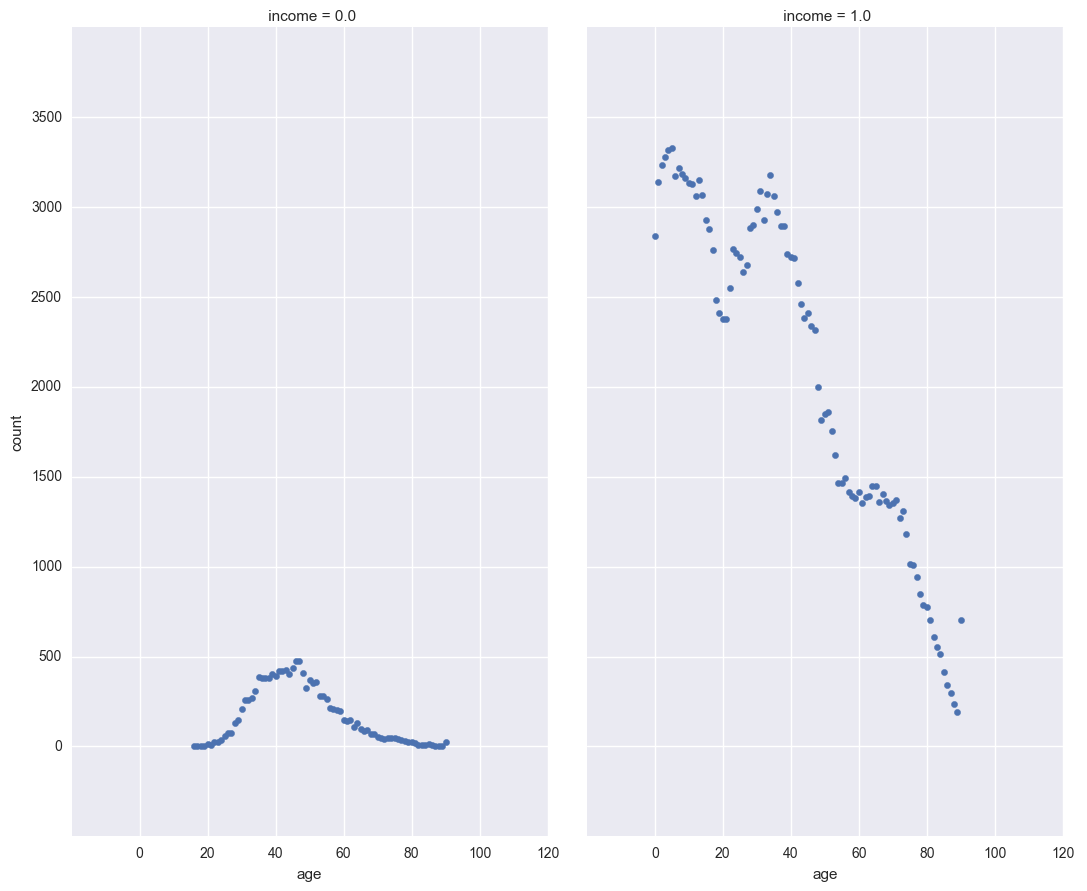

In [28]:
import matplotlib.pyplot as plt
g = sns.FacetGrid(age_census, col=" income",palette='Set1'
,size=9, aspect=.6, col_wrap=2)
g.map(plt.scatter,'age','count_census_age')
g.set_axis_labels("age", "count")
g.set(xticks=np.arange(0,140,20))
g.set(yticks=np.arange(0,4000,500))
g.add_legend();

**Here we are creating a factor plot using the seaborn package. We notice that a lot of 'class of worker' (male and female) are earning less than 50000 especially especially 'not in universe' and 'private'. We also see that more women in these categories earn less than 50000.**

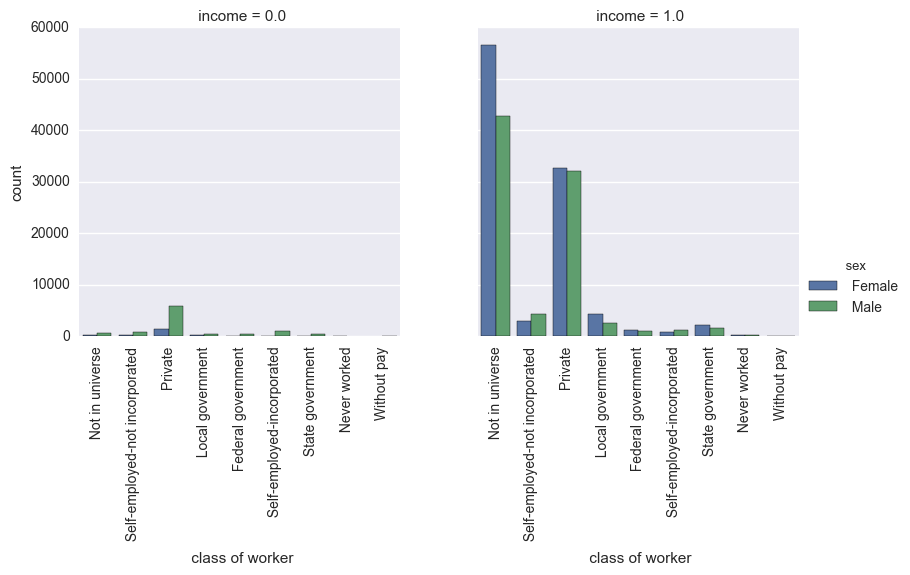

In [29]:
gf=sns.factorplot(" class of worker", col=' income',hue=' sex',data=census_learn,kind='count')
gf.set_xticklabels(rotation=90)

** Below using the factor plot we are trying to see whether 'marital status' makes any difference to the income level. We notice it does. It is interesting to note that irrespective of marital status very few people earn more than 50000.Especially never married and people who are married with spouse present.**

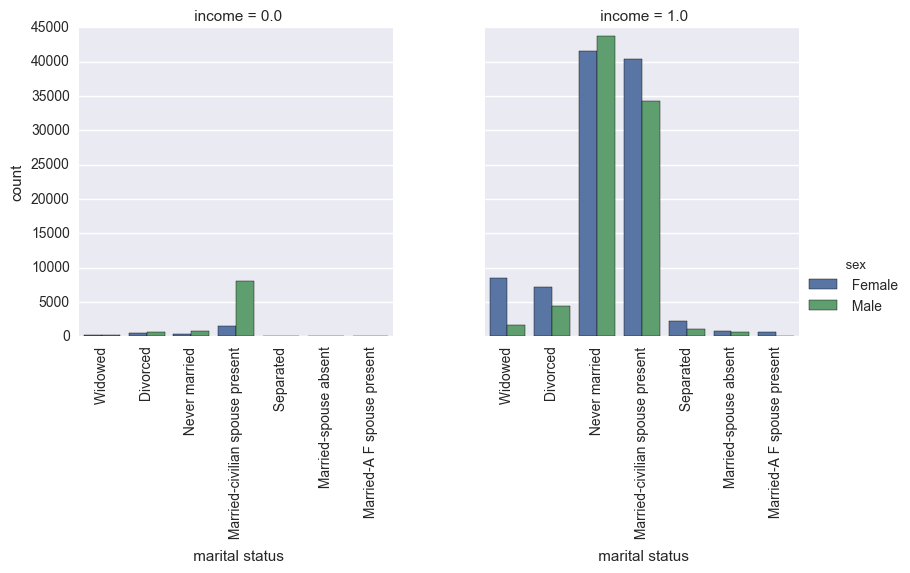

In [30]:
gf1=sns.factorplot(" marital status", col=' income',hue=' sex',data=census_learn,kind='count')
gf1.set_xticklabels(rotation=90)

**Now we are trying to see whether race makes any difference in income level among male and females. Again the same story. Especially among white and black men and women a lot of people are earning less than 50000. Very interesting to note that whites earning less than 50000 are a lot more than black. Also black male and female earning more than 50000 are very very few.**

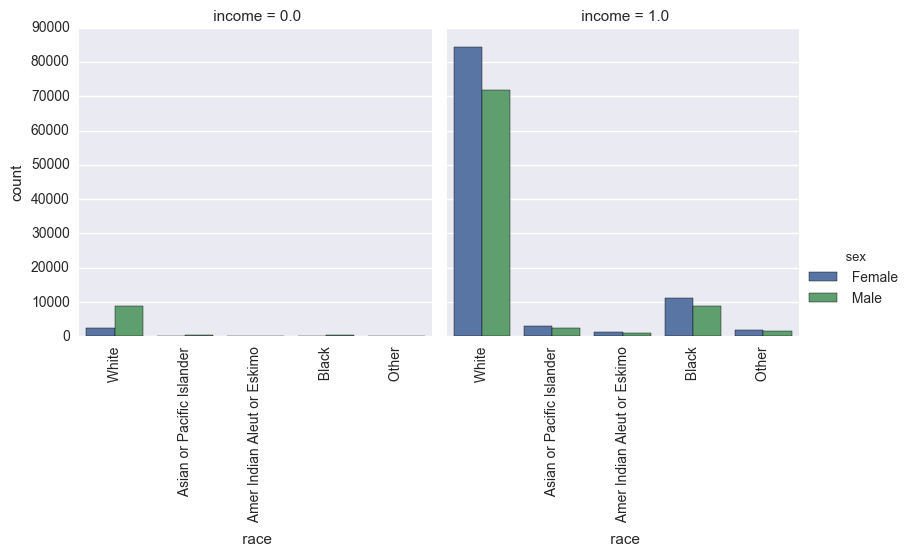

In [31]:
gf2=sns.factorplot(" race", col=' income',hue=' sex',data=census_learn,kind='count')
gf2.set_xticklabels(rotation=90)

**Below we see that a lot of people in labor unions earn less than 50000.**

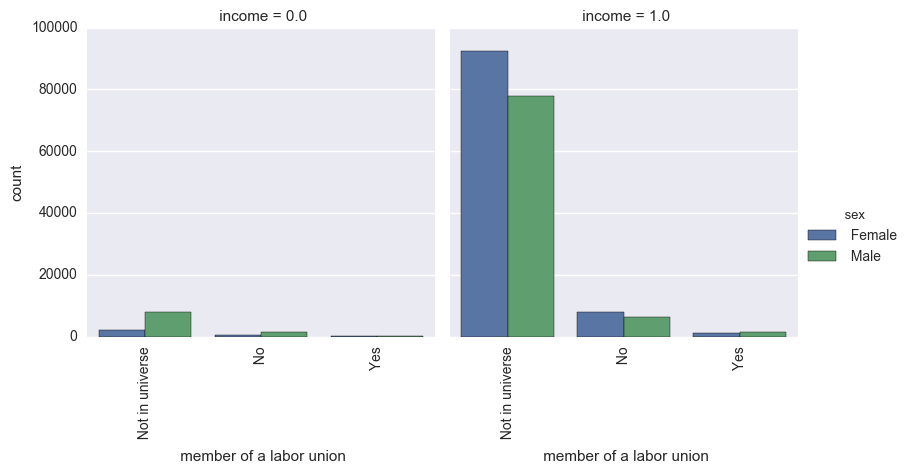

In [32]:
gf3=sns.factorplot(" member of a labor union", col=' income',hue=' sex',data=census_learn,kind='count')
gf3.set_xticklabels(rotation=90)

**Below is another graphical breakup in terms of household summary. We notice that more householders earns less than 50000 than any other category. A significant number of 'under 18 never married' and 'spouse of householder' earn less than 50000.**

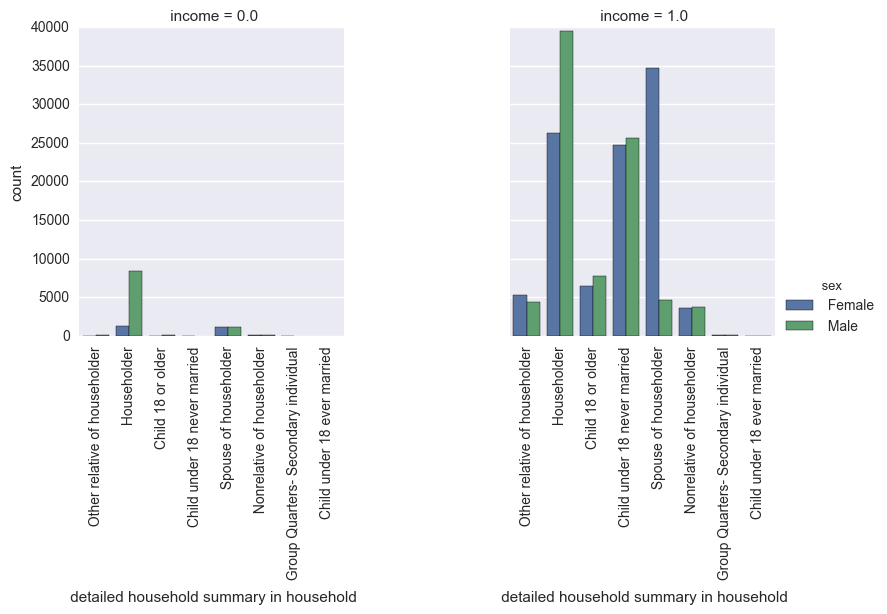

In [33]:
gf4=sns.factorplot(" detailed household summary in household", col=' income',hue=' sex',data=census_learn,kind='count')
gf4.set_xticklabels(rotation=90)

**Below are similar graphical breakdowns in terms of citizenship and self employment.**

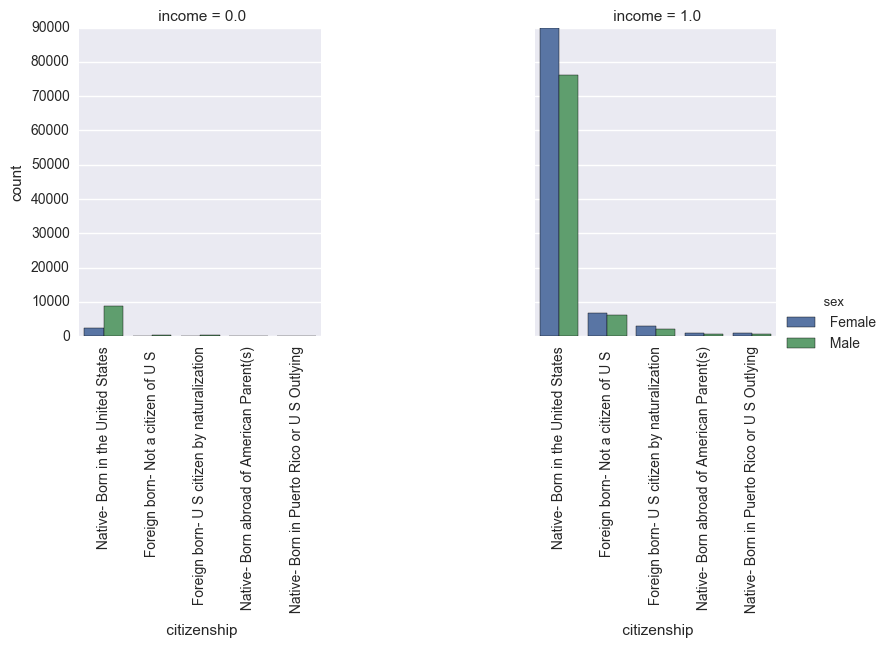

In [34]:
gf5=sns.factorplot(" citizenship", col=' income',hue=' sex',data=census_learn,kind='count')
gf5.set_xticklabels(rotation=90)

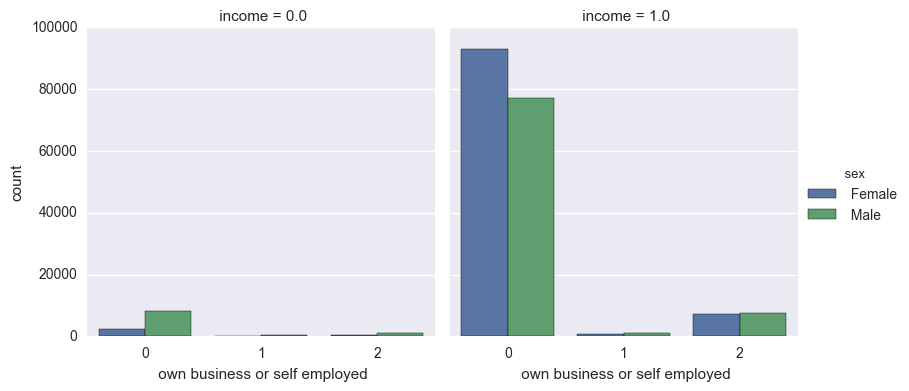

In [35]:
gf6=sns.factorplot(" own business or self employed", col=' income',hue=' sex',data=census_learn,kind='count')


**similar analysis in terms of marital status and race with respect to business or self employment are given in the two graphs below.**

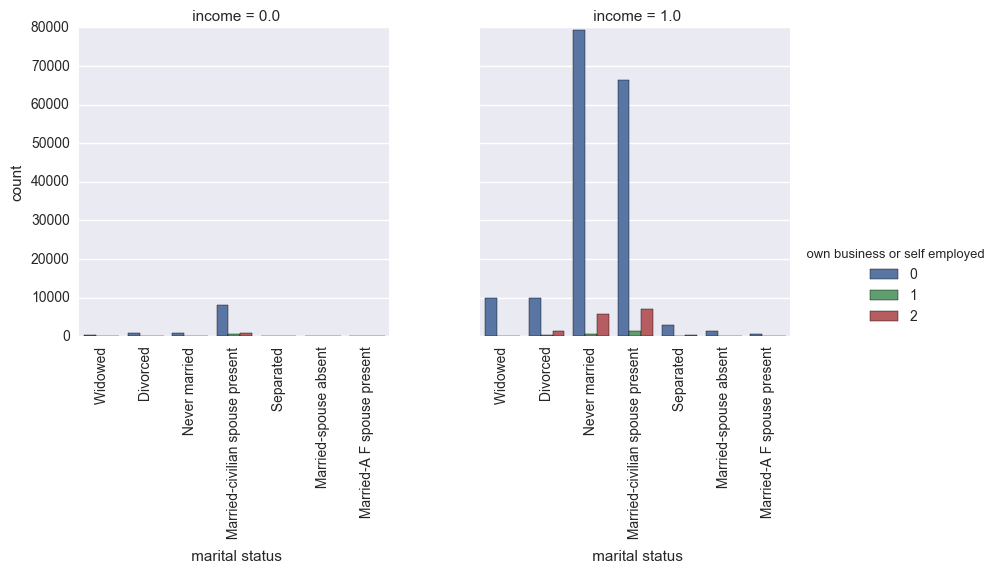

In [36]:
gf7=sns.factorplot(" marital status", col=' income',hue=' own business or self employed',data=census_learn,kind='count')
gf7.set_xticklabels(rotation=90)

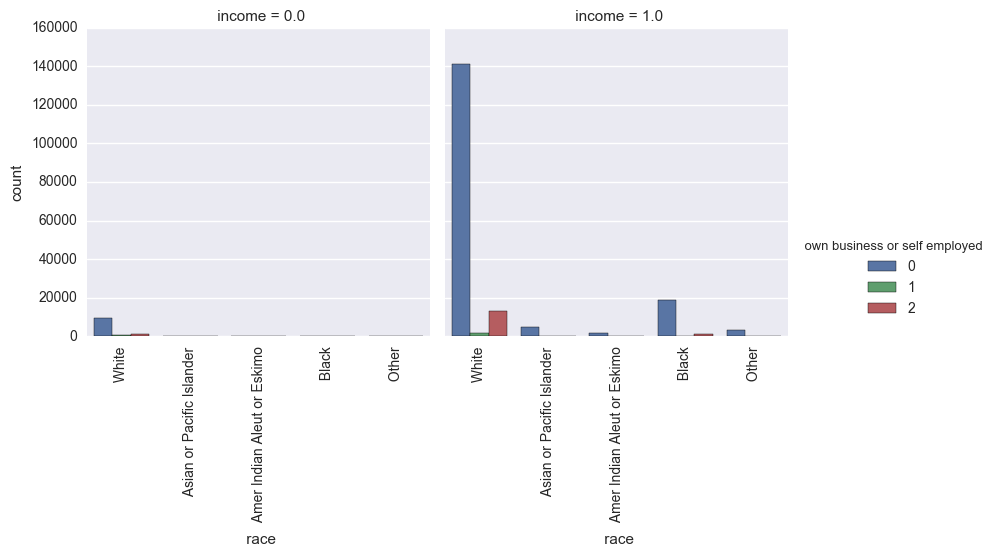

In [37]:
gf8=sns.factorplot(" race", col=' income',hue=' own business or self employed',data=census_learn,kind='count')
gf8.set_xticklabels(rotation=90)

In [38]:
census_learn[' income']=pd.get_dummies(census_learn[' income'])
census_test[' income']=pd.get_dummies(census_test[' income'])

In [39]:
census_test.head(22)

,age,class of worker,industry code,occupation code,education,wage per hour,enrolled in edu inst last wk,marital status,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,income
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,0.0
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,0.0
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,0.0
3,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,0.0
4,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,0.0
5,13,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Germany,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0.0
6,1,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Mexico,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0.0
7,61,Not in universe,0,0,High school graduate,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,0.0
8,38,Private,45,12,Masters degree(MA MS MEng MEd MSW MBA),0,Not in universe,Married-civilian spouse present,Other professional services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,0.0
9,7,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0.0


** Below we are converting all ? to NaN.**

In [40]:

census_learn = census_learn.replace(' ?', np.nan)


**Below we get the number of missing values in every category of census_learn.**

In [41]:
census_learn.isnull().sum()

age                                                0
 class of worker                                   0
 industry code                                     0
 occupation code                                   0
 education                                         0
 wage per hour                                     0
 enrolled in edu inst last wk                      0
 marital status                                    0
 major industry code                               0
 major occupation code                             0
 race                                              0
 hispanic Origin                                   0
 sex                                               0
 member of a labor union                           0
 reason for unemployment                           0
 full or part time employment stat                 0
 capital gains                                     0
 capital losses                                    0
 divdends from stocks                         

**Similarly for census_test.**

In [42]:
census_test=census_test.replace(' ?', np.nan)

In [43]:
census_test.isnull().sum()

age                                                0
 class of worker                                   0
 industry code                                     0
 occupation code                                   0
 education                                         0
 wage per hour                                     0
 enrolled in edu inst last wk                      0
 marital status                                    0
 major industry code                               0
 major occupation code                             0
 race                                              0
 hispanic Origin                                   0
 sex                                               0
 member of a labor union                           0
 reason for unemployment                           0
 full or part time employment stat                 0
 capital gains                                     0
 capital losses                                    0
 divdends from stocks                         

** We are removing the row which is not present in census_test. How did I get it. I cheated a little. A few steps below I found that the number of features in training data and testing data are not same. I found out where the difference was and hence the step below. I don't think Deletion of this row creates a major problem.**

In [44]:
census_learn = census_learn[census_learn[' detailed household and family stat']!= ' Grandchild <18 ever marr not in subfamily']

** Below we are creating the training set and testing set. We choose all the columns except the last one as feature columns. The target column is the income level column.**

In [45]:
# Extract feature columns
feature_cols_learn = list(census_learn.columns[:-1])
feature_cols_test = list(census_test.columns[:-1])

# Extract target column 'income'
target_col_l = census_learn.columns[-1] 
target_col_t = census_test.columns[-1]

# Show the list of columns
print("Feature columns:\n{}".format(feature_cols_learn))
print("\nTarget column: {}".format(target_col_l))


X_train = census_learn[feature_cols_learn]
y_train = census_learn[target_col_l]

X_test = census_test[feature_cols_test]
y_test = census_test[target_col_t]


Feature columns:
['age', ' class of worker', ' industry code', ' occupation code', ' education', ' wage per hour', ' enrolled in edu inst last wk', ' marital status', ' major industry code', ' major occupation code', ' race', ' hispanic Origin', ' sex', ' member of a labor union', ' reason for unemployment', ' full or part time employment stat', ' capital gains', ' capital losses', ' divdends from stocks', ' tax filer status', ' region of previous residence', ' state of previous residence', ' detailed household and family stat', ' detailed household summary in household', ' instance weight', ' migration code-change in msa', ' migration code-change in reg', ' migration code-move within reg', ' live in this house 1 year ago', ' migration prev res in sunbelt', ' num persons worked for employer', ' family members under 18', ' country of birth father', ' country of birth mother', ' country of birth self', ' citizenship', ' own business or self employed', " fill inc questionnaire for veteran

**The function below accomplises a very important thing. It converts the non-numeric objects into dummy numeric variables.**

In [46]:
def preprocess_features(X):
    ''' Preprocesses the conversion data and converts non-numeric variables into
        dummy variables.  '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_train = preprocess_features(X_train)

X_test = preprocess_features(X_test)


**As an aside this is the place where I found what to delete from census_learn.**

In [47]:
list1=list(X_train.columns)
list2=list(X_test.columns)

next( (idx, x, y) for idx, (x, y) in enumerate(zip(list1, list2)) if x!=y )

*** This 'list1[195]' command told me what to remove from census_learn.***

**Below we are creating functions which calculates f1_score and accuracy_score  for the models we will choose.**

In [49]:
from sklearn.metrics import accuracy_score
def predict_labels_accuracy(clf, features, target):
    ''' Makes predictions using a fit classifier based on accuracy score. '''
    
    y_pred = clf.predict(features)
     
    return accuracy_score(target.values, y_pred)

In [73]:
from sklearn.metrics import f1_score
def predict_labels_f1(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    y_pred = clf.predict(features)
     
    return f1_score(target.values, y_pred)

**We first choose logistic regression. Logistic regression classifies by calculating the probabilities P(Y=1|X) and P(Y=0|X). The formula is P(Y=1|X)=1/(1+e^(-z)) where z is the weighted sum of the explanatory variables X.**

In [51]:
from sklearn import linear_model

clf = linear_model.LogisticRegression(random_state=130)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=130, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

**Below we are trying to calculate the accuracy and f1 score for our model. We see that even though the accuracy is high the f1 score is low suggesting that the model is probably not a good fit. We can use L1 or L2 regularization to logistic regression. But before that we will try a decision tree.**

In [52]:
accuracy_train = predict_labels_accuracy(clf, X_train, y_train)

In [53]:
accuracy_train

0.95231579633221564

In [54]:
accuracy_test = predict_labels_accuracy(clf, X_test, y_test)

In [55]:
accuracy_test

0.95272749142960245

In [61]:
f1_train = predict_labels_f1(clf, X_train, y_train)

In [62]:
f1_train

0.49079426247056301

In [63]:
f1_test = predict_labels_f1(clf, X_test, y_test)

In [64]:
f1_test

0.49550706033376124

In [65]:
from sklearn import tree

clf_1 = tree.DecisionTreeClassifier(random_state=130)
clf_1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=130, splitter='best')

In [67]:
accuracy_train_tree = predict_labels_accuracy(clf_1, X_train, y_train)

In [68]:
accuracy_train_tree 

0.99999498799625097

In [69]:
accuracy_train_tree_test = predict_labels_accuracy(clf_1, X_test, y_test)

In [70]:
accuracy_train_tree_test

0.93389266454160902

In [78]:
f1_train_tree = predict_labels_f1(clf_1, X_train, y_train)

In [79]:
f1_train_tree

0.99995961717077897

In [80]:
f1_test_tree = predict_labels_f1(clf_1, X_test, y_test)

In [81]:
f1_test_tree

0.48164741020199636

** I am trying to do it very fast, so I maybe wrong. But something very interesting happened above. For logistic regression the accuracy_scores are very high and f1_scores are very low. For decision tree model the accuracy scores are also remarkable. In case of f1_score its very high for training and very low for test set suggesting overfitting. We can try to specify how many max branches of the tree we want to improve performance. Also changing the random_state changes performance accuracy. I tried SVM but it was very slow and didn't stop running until I restarted my kernel. Below we are creating confusion matrices and heatmaps for tests sets for both the models.**

In [82]:
from sklearn.metrics import confusion_matrix

def predict_labels_confusion(clf, features, target):
    ''' Makes predictions using a fit classifier and returns confusion matrix. '''
    
    y_pred = clf.predict(features)
     
    return confusion_matrix(target.values, y_pred)

cm=predict_labels_confusion(clf,X_test,y_test)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm

array([[ 0.99095922,  0.00904078],
       [ 0.62560621,  0.37439379]])

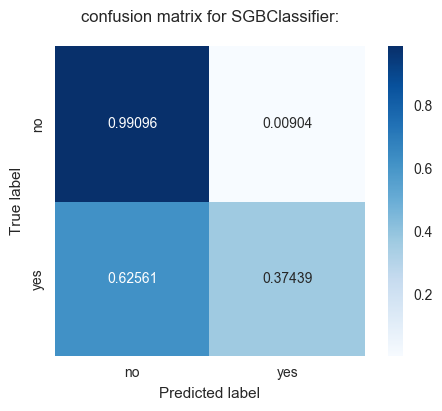

In [83]:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True,fmt='.5f', cmap='Blues', xticklabels = ['no','yes'], yticklabels = ['no','yes'],square=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('confusion matrix for SGBClassifier:\n')

In [86]:
cm1=predict_labels_confusion(clf_1,X_test,y_test)
cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]
cm1

array([[ 0.96288578,  0.03711422],
       [ 0.50468801,  0.49531199]])

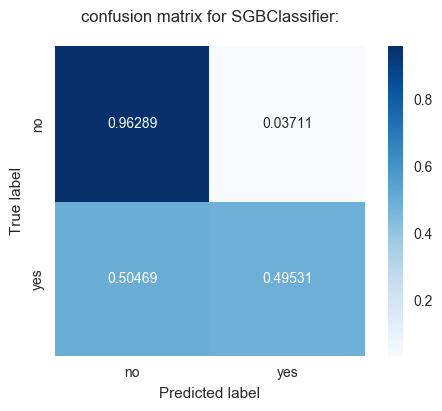

In [85]:
cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm1, annot=True,fmt='.5f', cmap='Blues', xticklabels = ['no','yes'], yticklabels = ['no','yes'],square=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('confusion matrix for SGBClassifier:\n')

**We see that both models calculate the true negatives remarkably well but does very badly for true positives. So in that respect I think both are bad models. But surely we can try to improve upon this and see how they perform.**